In [51]:
import numpy as np,pandas as pd, matplotlib.pyplot as plt

In [52]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [53]:
X = dataset.iloc[:, 1:2].values # X has to be an array not list
Y = dataset.iloc[:, 2].values


In [54]:
# Here we explicitly have to perform scaling as SVR implicitly doesn't do it
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_Y = StandardScaler()
Y = sc_Y.fit_transform(Y.reshape(10,1)) # Here reshaping because it expect 2d array so making it 10 row and 1 column

In [55]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,Y.ravel()) # Here using ravel to shape it back to 1 D array as here it is expected as 1D 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [56]:
y_pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array(6.5).reshape(-1,1))))
y_pred

array([170370.0204065])

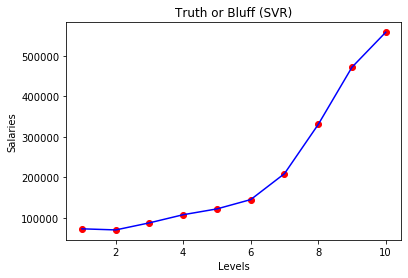

In [60]:
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(regressor.predict(X)), color = 'red')
plt.plot(sc_X.inverse_transform(X),sc_Y.inverse_transform(regressor.predict(X)),color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Levels')
plt.ylabel('Salaries')
plt.show()